## Bias in Brain Stroke Dataset

This notebook will explore the statistical bias behind this healthcare dataset. The idea of understanding the bias in such dataset would help to improve the fairness of the trained model on critical decision-making tasks ( i.e "Do I want my model to unfairly predict brain stroke on female compared to male"). We will explore many ways to describe bias in such datasets.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


## Importing the Dataset and quickly describe its content

In [2]:
df=pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.shape

(4981, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


<Figure size 1080x432 with 0 Axes>

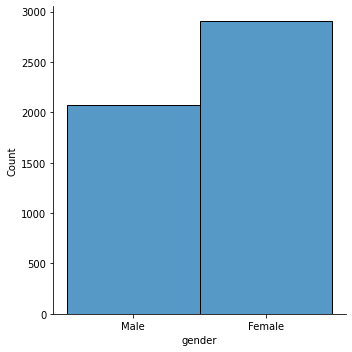

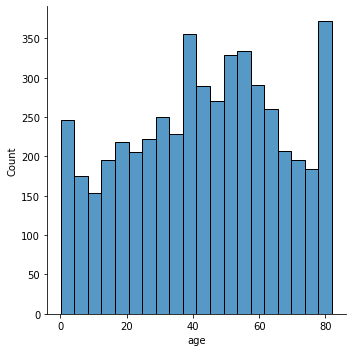

In [7]:
plt.figure(figsize = (15,6))
sns.displot(df, x="gender")
sns.displot(df, x="age")

## Describe bias on data

There are several ways to measure bias in datasets. The most popular ones are Statistical Parity (also called risk difference) and Disparate Impact (also called risk ratio)
Those metrics compare the difference (or ratio) of individual from a specific group , having a positive attribute (in this case it would be stroke=1). The condition on getting no bias between two demographic groups with those metric are the following: Statistical Parity must be equal to 0 (i.e no risk difference), and Disparate Impact equal to 1 (perfect risk ratio)

To use this metric we need to define 2 groups from what we call the sensitive attribute. The sensitive attribute is what we assume to be the point of discrimination with our datasets or model, usually there would be social discrimination, therefore the sensitive attribute would be either gender, age, or skin color.

On this dataset for this study we choose arbitrarly 3 sensitive attributes : age, gender and work-type. Lets see what happen for each groups !

## Bias toward Age

To work on such feature, we need to binarize it ! For that we can take the median value (43 years old), and create a new column containing a binary variable whether the individual is older or younger that 43 years old.

In [8]:
def binarize_age(row):
    if row['age']>43 : # old dude
        val = 0
    else:
        val = 1
    return val

df['bin_age'] = df.apply(binarize_age, axis=1)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,1
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,1
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,1


In [10]:
fav_binage0 = (df[(df['bin_age']==0) & (df.stroke==1)].shape[0])/df[(df['bin_age']==0)].shape[0]
print("fav_binage0 =", fav_binage0)
fav_binage1 = (df[(df['bin_age']==1) & (df.stroke==1)].shape[0])/df[(df['bin_age']==1)].shape[0]
print("fav_binage1 =", fav_binage1)

fav_binage0 = 0.09157368218545595
fav_binage1 = 0.0041981528127623844


In [11]:
# Statistical Demographic Parity
spd = abs(fav_binage0-fav_binage1)
print("SPD =", spd)
# Disparate Impact
di = fav_binage1/fav_binage0
print("DI =", di)

SPD = 0.08737552937269356
DI = 0.04584453428726654


Getting such results on age, where the SPD is pretty high (> 5% diff) and especially with the DI that low (4%), we see that the "young" age group is pretty unpriviledged using both definition, in this example unprivileged is pretty counter intuitive, because if refer to the fact that "young" individual are way less prone to get the positive "stroke" feature, which is consistant with the assumption that older people are way more exposed to brain stroke. It shows the limit in using such metrics to explore bias in datasets, this is why new metrics where developped to asses bias in other condition ( see "Equality of Opportunity in Supervised Learning" https://arxiv.org/pdf/1610.02413.pdf )

Lets see what happen with gender, a demographic partition where we could assume less correlation between the latter and brain stroke risk.


## Bias toward Gender

This attribute is already binary so no need to do further preprocess

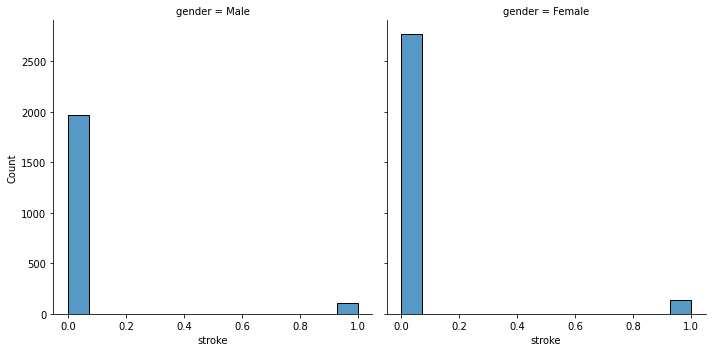

In [12]:
ax = sns.displot(df, x="stroke", col="gender")

In [13]:
fav_male = (df[(df['gender']=='Male') & (df.stroke==1)].shape[0])/df[(df['gender']=='Male')].shape[0]
print("fav_binage_male =", fav_male)
fav_female = (df[(df['gender']=='Female') & (df.stroke==1)].shape[0])/df[(df['gender']=='Female')].shape[0]
print("fav_binage_female =", fav_female)

fav_binage_male = 0.052073288331726135
fav_binage_female = 0.048159614723082216


In [14]:
# Statistical Demographic Parity
spd = abs(fav_male-fav_female)
print("SPD =", spd)
# Disparate Impact
di = fav_female/fav_male
print("DI =", di)

SPD = 0.0039136736086439194
DI = 0.9248429716265973


Those values pretty much confirms our assumption that this dataset gives close to no bias on stroke detection in relation to individual gender, getting an SPD value close to 0, and a DI value close to 1. Even though we can see clearly that this dataset contains more case of stroke with female compared to cases with male individuals.
Finally lets see if there is bias according to the work type. 

## Bias towards work group

Lets see all work group categories and the decide on how to cut this into two groups

In [15]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

We distinguishes 4 categories, children and active adult working whether in the Private,Public sector or Self-employed. To not take into account age, we will discard the 'children' group and only focus on active adult. Lets create the following partition : Private sector vs {Public sector + Self-employed}

In [16]:
def binarize_worktype(row):
    if row['work_type'] in ['Self-employed', 'Govt_job']: # unprivileged ?
        val = 0
    elif row['work_type'] == 'Private':
        val = 1
    else: 
        val = 2
    return val

df['bin_work'] = df.apply(binarize_worktype, axis=1)

In [17]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bin_age,bin_work
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,1,1
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,1,1
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,0,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,1,1


In [18]:
fav_binwork0 = (df[(df['bin_work']==0) & (df.stroke==1)].shape[0])/df[(df['bin_work']==0)].shape[0]
print("fav_binwork0 =", fav_binwork0)
fav_binwork1 = (df[(df['bin_work']==1) & (df.stroke==1)].shape[0])/df[(df['bin_work']==1)].shape[0]
print("fav_binwork1 =", fav_binwork1)

fav_binwork0 = 0.06767955801104972
fav_binwork1 = 0.05174825174825175


In [19]:
# Statistical Demographic Parity
spd = abs(fav_binwork0-fav_binwork1)
print("SPD =", spd)
# Disparate Impact
di = fav_binwork1/fav_binwork0
print("DI =", di)

SPD = 0.01593130626279797
DI = 0.764606821749679


While the absolute statistical parity difference is pretty low, the disparate impact shows that there could be a bias toward work group where people working in the private sector are less prone to get brain stroke compared to people working in the public sector or being self-employed. There may be a correlation between work type and probability to get stroke. But to verify such statement we would need to do further statistical tests.

## Conclusion

In this notebook we explored ways to asses demographic group bias in the Brain Stroke dataset, on 3 type of binary partition. This can give some insight on the kind of bias the end model could be exposed to, especially considering the case were getting a perfect classifier also means that the latter perfectly embed the prior dataset biases. 
Such metrics are also obviously used during model inference to test model bias, which could be the subject of future works.

## Bibliography
* Luca Oneto and Silvia Chiappa ,**Fairness in Machine Learning** In Recent Trends in Learning From Data. Studies in Computational Intelligence, vol 896. Springer, Cham, 2020, https://arxiv.org/abs/2012.15816
* Dwork, C., Hardt, M., Pitassi, T., Reingold, O., and Zemel, R. **Fairness through awareness**. In Proceedings of the 3rdInnovations in Theoretical Computer Science Conference,pp. 214–226, 2012 https://arxiv.org/abs/1104.3913
* Hardt, M., Price, E., and Srebro, N. **Equality of opportunity in supervised learning**. In Neural Information Processing Systems (NIPS), 2016. https://arxiv.org/pdf/1610.02413.pdf